In [1]:
import jax
import jax.numpy as jnp
from jax import grad, vmap, jit
import jax.random as random
from functools import partial
from typing import Callable, Union
from collections import namedtuple
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

from kernel import imq_kernel, rbf_kernel
from model import model
from methods import VGD
from experiment import experiment, diagnostic_experiment
from calculate_mmd import calculate_mmd_squared
from plot_functions import plot_predictives

def my_sigmoid(x):
    return 1 / (1 + jnp.exp(-x))

def sigmoid_reg(theta, x):
    return 1 / (1 + jnp.exp(-theta * x))

sig_model = model(0.05, sigmoid_reg, theta_dim=1)

/home/lqy_unix/Project_3_refactor/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 100 well

In [22]:
# z = b0 + b1*x
b0 = 0  # intercept)
b1 = 10   # slope
sigma = 0.05
prefix = 'sig'

key = random.PRNGKey(40)
rng, rng2 = random.split(key)
n_data = 100

x = random.uniform(rng, (n_data,))*2-1

# observed data with noise
noise = random.normal(rng2, x.shape) * sigma
y_observed = my_sigmoid(b0 + b1 * x) + noise

# y_observed = np.clip(y_observed, 0.01, 0.99)

data_sig_100_w = (x, y_observed)

experiment_sig_100_w = experiment(sig_model, data_sig_100_w, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_100_w.run(n_steps=5000, step_size=0.01)

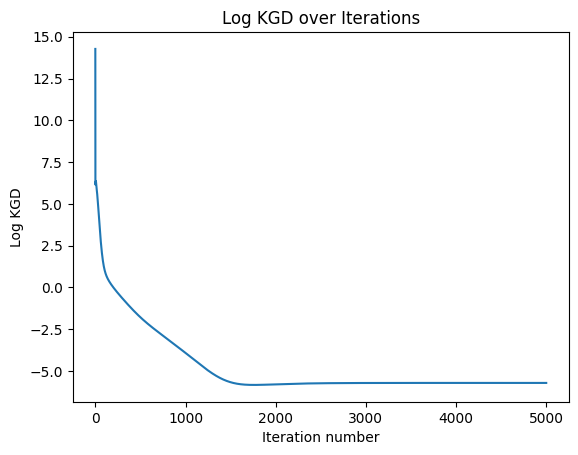

In [23]:
experiment_sig_100_w.plot_KGD()

In [20]:
experiment_sig_100_w.particles_VGD.mean()

Array(8.647638, dtype=float32)

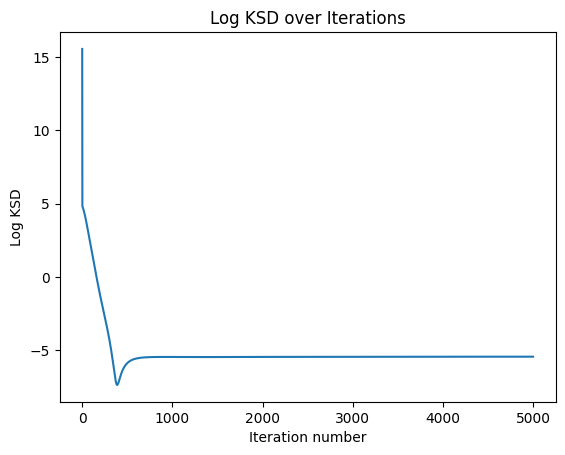

In [24]:
experiment_sig_100_w.plot_KSD()

MMD length scale: 0.43963164
Actual mmd 1.1333695e-05


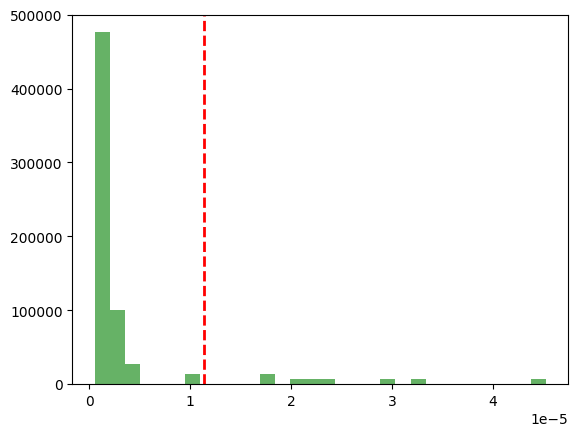

In [25]:
diagnostic_experiment_sig_100_w = diagnostic_experiment(experiment_sig_100_w)
all_mmd_values_sig_100_w, actual_mmd_sig_100_w = diagnostic_experiment_sig_100_w.plot_diagnostic()

## 100 mis

In [29]:
key = random.PRNGKey(42)

# U(-1, 1)
key, x_key = random.split(key)
x = random.uniform(x_key, (n_data,), minval=-1.0, maxval=1.0)

# keys for x < 0 and x > 0
key, y_neg_key, y_pos_key = random.split(key, 3)

# x < 0, Unif(0, 0.5)
y_neg = random.uniform(y_neg_key, (n_data,), minval=0.0, maxval=0.5)

# x > 0, Unif(0.5, 1)
y_pos = random.uniform(y_pos_key, (n_data,), minval=0.5, maxval=1.0)

# if x[i] < 0, y_observed[i] = y_neg[i]
# else y_observed[i] = y_pos[i]
y_observed = jnp.where(x < 0, y_neg, y_pos)


data_sig_100_m = (x, y_observed)

experiment_sig_100_m = experiment(sig_model, data_sig_100_m, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_100_m.run(n_steps=5000, step_size=0.01)

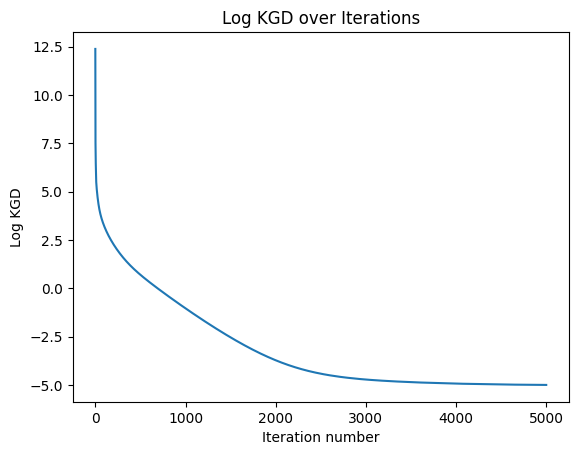

In [30]:
experiment_sig_100_m.plot_KGD()

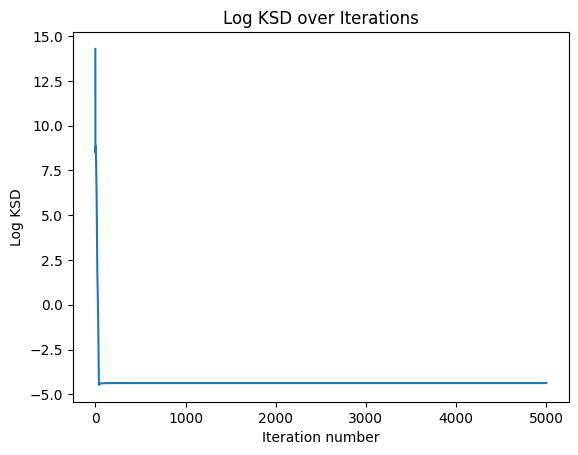

In [31]:
experiment_sig_100_m.plot_KSD()

MMD length scale: 0.27198818
Actual mmd 0.0004709693


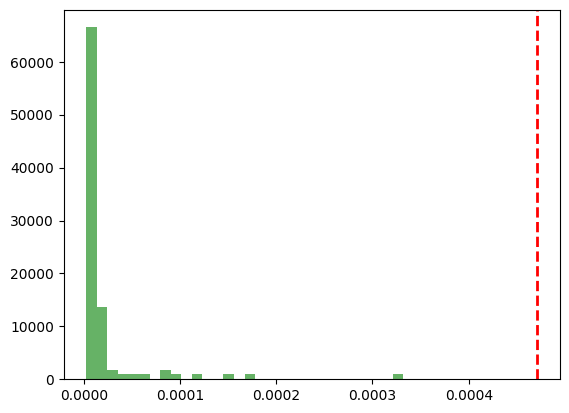

In [32]:
diagnostic_experiment_sig_100_m = diagnostic_experiment(experiment_sig_100_m)
all_mmd_values_sig_100_m, actual_mmd_sig_100_m = diagnostic_experiment_sig_100_m.plot_diagnostic()

## 1000 well

In [36]:
# z = b0 + b1*x
b0 = 0  # intercept)
b1 = 10   # slope
sigma = 0.05
prefix = 'sig'

key = random.PRNGKey(40)
rng, rng2 = random.split(key)
n_data = 1000

x = random.uniform(rng, (n_data,))*2-1

# observed data with noise
noise = random.normal(rng2, x.shape) * sigma
y_observed = my_sigmoid(b0 + b1 * x) + noise

# y_observed = np.clip(y_observed, 0.01, 0.99)

data_sig_1000_w = (x, y_observed)

experiment_sig_1000_w = experiment(sig_model, data_sig_1000_w, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_1000_w.run(n_steps=10000, step_size=0.001)

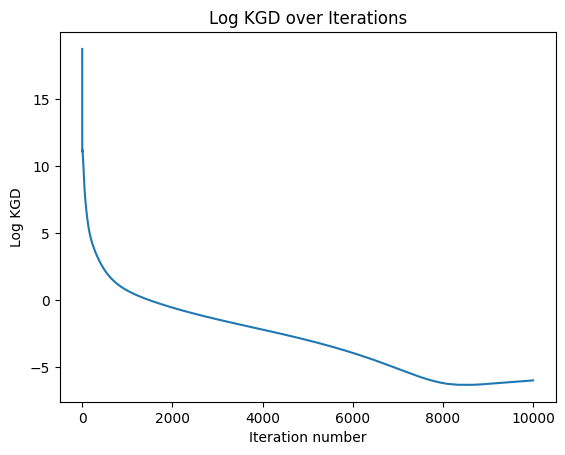

In [38]:
experiment_sig_1000_w.plot_KGD()

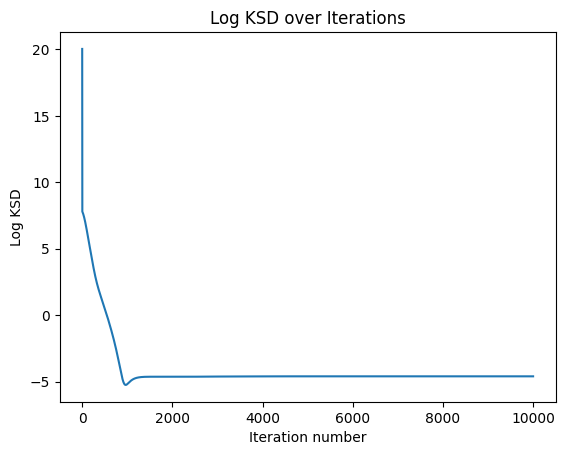

In [37]:
experiment_sig_1000_w.plot_KSD()

MMD length scale: 0.44536954
Actual mmd 3.295612e-07


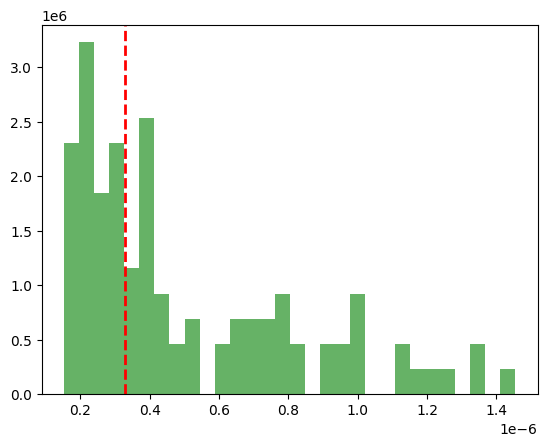

In [40]:
diagnostic_experiment_sig_1000_w = diagnostic_experiment(experiment_sig_1000_w)
all_mmd_values_sig_1000_w, actual_mmd_sig_1000_w = diagnostic_experiment_sig_1000_w.plot_diagnostic()

## 1000 mis

In [50]:
key = random.PRNGKey(42)
n_data = 1000

# U(-1, 1)
key, x_key = random.split(key)
x = random.uniform(x_key, (n_data,), minval=-1.0, maxval=1.0)

# keys for x < 0 and x > 0
key, y_neg_key, y_pos_key = random.split(key, 3)

# x < 0, Unif(0, 0.5)
y_neg = random.uniform(y_neg_key, (n_data,), minval=0.0, maxval=0.5)

# x > 0, Unif(0.5, 1)
y_pos = random.uniform(y_pos_key, (n_data,), minval=0.5, maxval=1.0)

# if x[i] < 0, y_observed[i] = y_neg[i]
# else y_observed[i] = y_pos[i]
y_observed = jnp.where(x < 0, y_neg, y_pos)


data_sig_1000_m = (x, y_observed)

experiment_sig_1000_m = experiment(sig_model, data_sig_1000_m, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_1000_m.run(n_steps=40000, step_size=0.0005)

In [104]:
jnp.mean(experiment_sig_1000_m.particles_SVGD)

Array(1.6700191, dtype=float32)

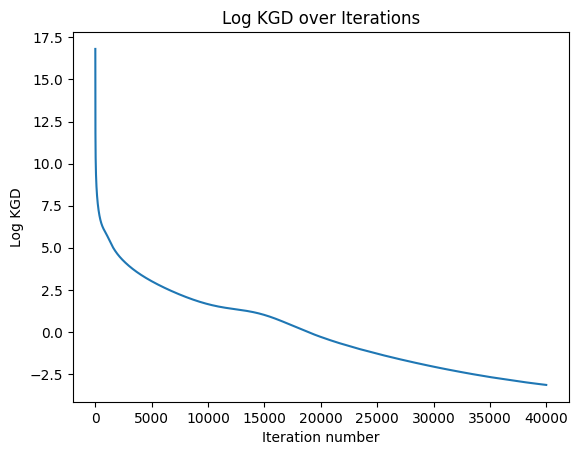

In [51]:
experiment_sig_1000_m.plot_KGD()

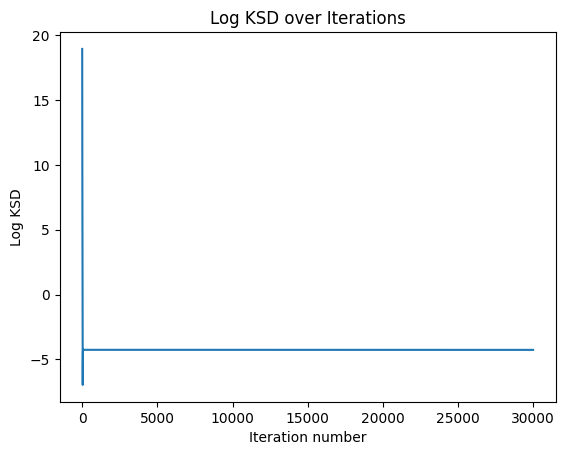

In [49]:
experiment_sig_1000_m.plot_KSD()

[[0.7551082  0.73772264]
 [0.70269763 0.6792024 ]]


  0%|          | 0/4000 [00:00<?, ?it/s]

100%|██████████| 4000/4000 [00:12<00:00, 326.98it/s]


MMD length scale: 0.26341096
Actual mmd 0.00068264146


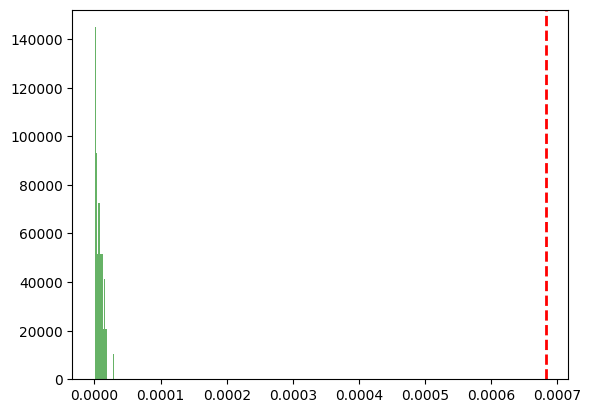

In [75]:
experiment_sig_1000_m.n_steps=4000
experiment_sig_1000_m.step_size=0.0005
diagnostic_experiment_sig_1000_m = diagnostic_experiment(experiment_sig_1000_m)
all_mmd_values_sig_1000_m, actual_mmd_sig_1000_m = diagnostic_experiment_sig_1000_m.plot_diagnostic()

In [41]:
diagnostic_experiment_sig_1000_m.mmd_length_scale

Array(0.26342598, dtype=float32)

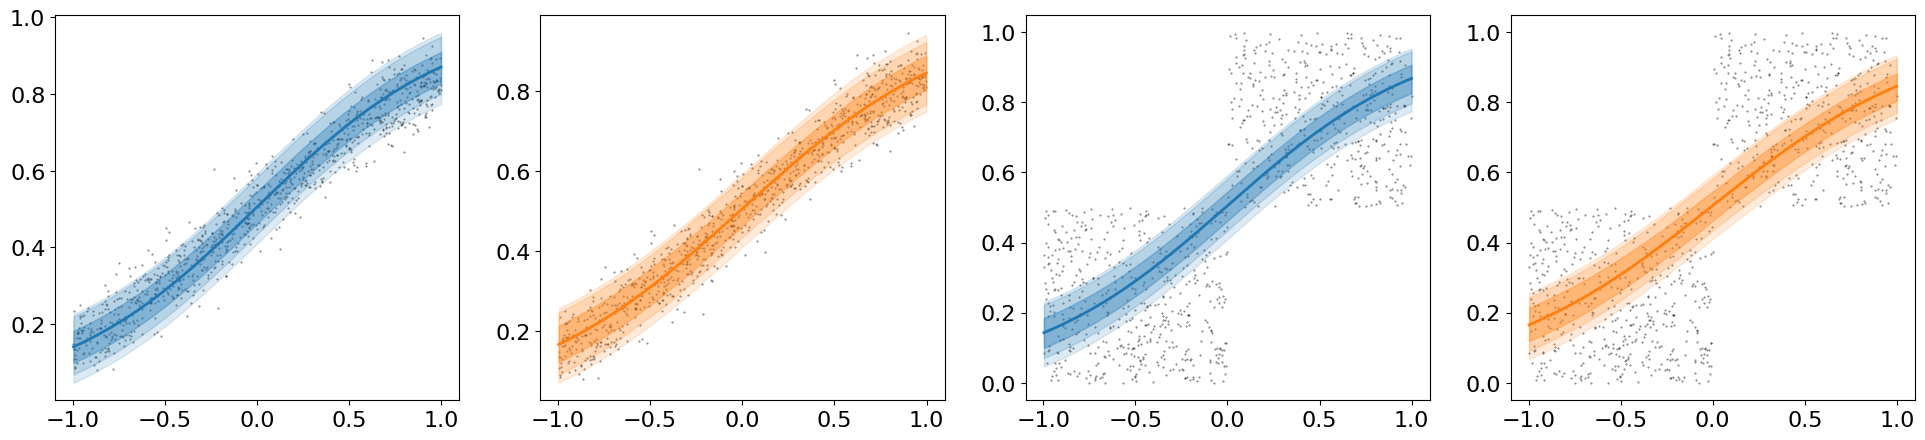

In [112]:
plot_predictives(
    experiment_sig_1000_w.particles_SVGD,
    experiment_sig_1000_w.particles_VGD,
    diagnostic_experiment_sig_1000_m.all_particles_SVGD[8],
    diagnostic_experiment_sig_1000_m.all_particles_VGD[8],
    data_sig_1000_w,
    data_sig_1000_m,
    intervals=[50, 80, 90]
)

## 10000 well

In [4]:
# z = b0 + b1*x
b0 = 0  # intercept)
b1 = 10   # slope
sigma = 0.05
n_data = 10000

data_sig_10000_w = sig_model.generate_data(n_data, b1, key=random.PRNGKey(0))

experiment_sig_10000_w = experiment(sig_model, data_sig_10000_w, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(49))
experiment_sig_10000_w.run(n_steps=20000, step_size=0.0005)

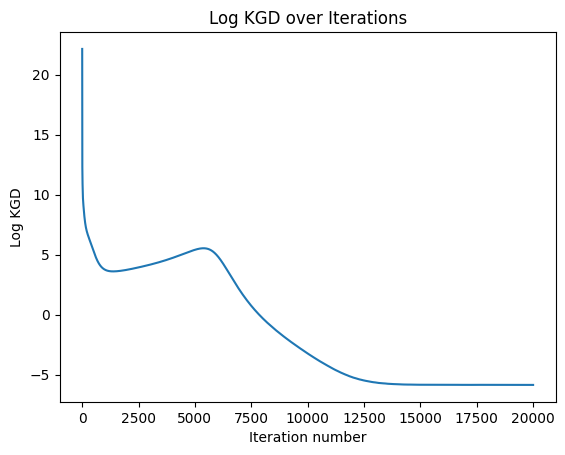

In [5]:
experiment_sig_10000_w.plot_KGD()

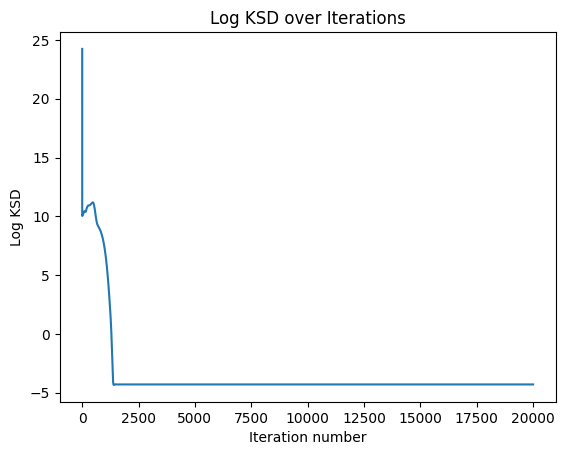

In [6]:
experiment_sig_10000_w.plot_KSD()

In [9]:
experiment_sig_10000_w.particles_SVGD.mean()

Array(9.98558, dtype=float32)

MMD length scale: 0.44715157
Actual mmd 2.9380155e-07


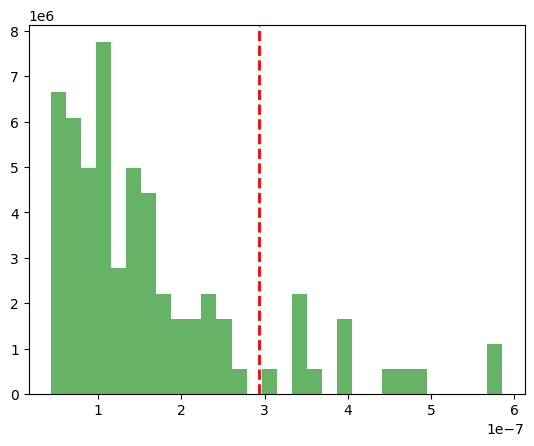

In [8]:
diagnostic_experiment_sig_10000_w = diagnostic_experiment(experiment_sig_10000_w)
all_mmd_values_sig_10000_w, actual_mmd_sig_10000_w = diagnostic_experiment_sig_10000_w.plot_diagnostic()

In [9]:
num_plots = len(diagnostic_experiment_sig_10000_w.all_history_KGD)
cols = 10
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2), sharex=True, sharey=True)
axes = axes.flatten()

for i, history in enumerate(diagnostic_experiment_sig_10000_w.all_history_KGD):
    ax = axes[i]
    ax.plot(range(15000), jnp.log(history))
    ax.set_title(f'History {i+1}', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True, linestyle='--', alpha=0.6)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Individual Histories (Subplots)', y=1.02, fontsize=16)
plt.savefig('individual_KGD_subplots_10000w.png', dpi=300) # 可以设置更高的 DPI 获得更清晰的图像
plt.close()

In [10]:
num_plots = len(diagnostic_experiment_sig_10000_w.all_history_KSD)
cols = 10
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2), sharex=True, sharey=True)
axes = axes.flatten()

for i, history in enumerate(diagnostic_experiment_sig_10000_w.all_history_KSD):
    ax = axes[i]
    ax.plot(range(15000), jnp.log(history))
    ax.set_title(f'History {i+1}', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.grid(True, linestyle='--', alpha=0.6)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Individual Histories (Subplots)', y=1.02, fontsize=16)
plt.savefig('individual_KSD_subplots_10000w.png', dpi=300) # 可以设置更高的 DPI 获得更清晰的图像
plt.close()

## 10000 mis

In [52]:
key = random.PRNGKey(42)
n_data = 10000

# U(-1, 1)
key, x_key = random.split(key)
x = random.uniform(x_key, (n_data,), minval=-1.0, maxval=1.0)

# keys for x < 0 and x > 0
key, y_neg_key, y_pos_key = random.split(key, 3)

# x < 0, Unif(0, 0.5)
y_neg = random.uniform(y_neg_key, (n_data,), minval=0.0, maxval=0.5)

# x > 0, Unif(0.5, 1)
y_pos = random.uniform(y_pos_key, (n_data,), minval=0.5, maxval=1.0)

# if x[i] < 0, y_observed[i] = y_neg[i]
# else y_observed[i] = y_pos[i]
y_observed = jnp.where(x < 0, y_neg, y_pos)


data_sig_10000_m = (x, y_observed)

experiment_sig_10000_m = experiment(sig_model, data_sig_10000_m, n_particles=20, kernel=imq_kernel, key=random.PRNGKey(42))
experiment_sig_10000_m.run(n_steps=80000, step_size=0.00005)

In [55]:
jnp.mean(experiment_sig_10000_m.particles_SVGD)

Array(1.8622509, dtype=float32)

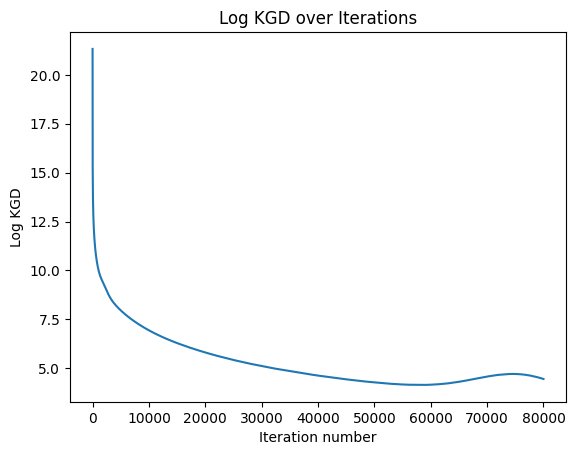

In [53]:
experiment_sig_10000_m.plot_KGD()

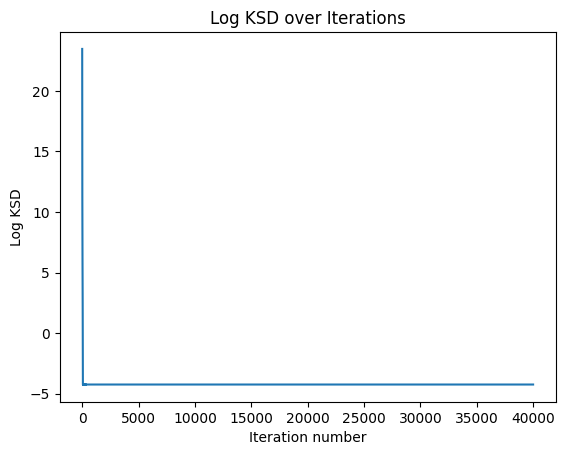

In [13]:
experiment_sig_10000_m.plot_KSD()

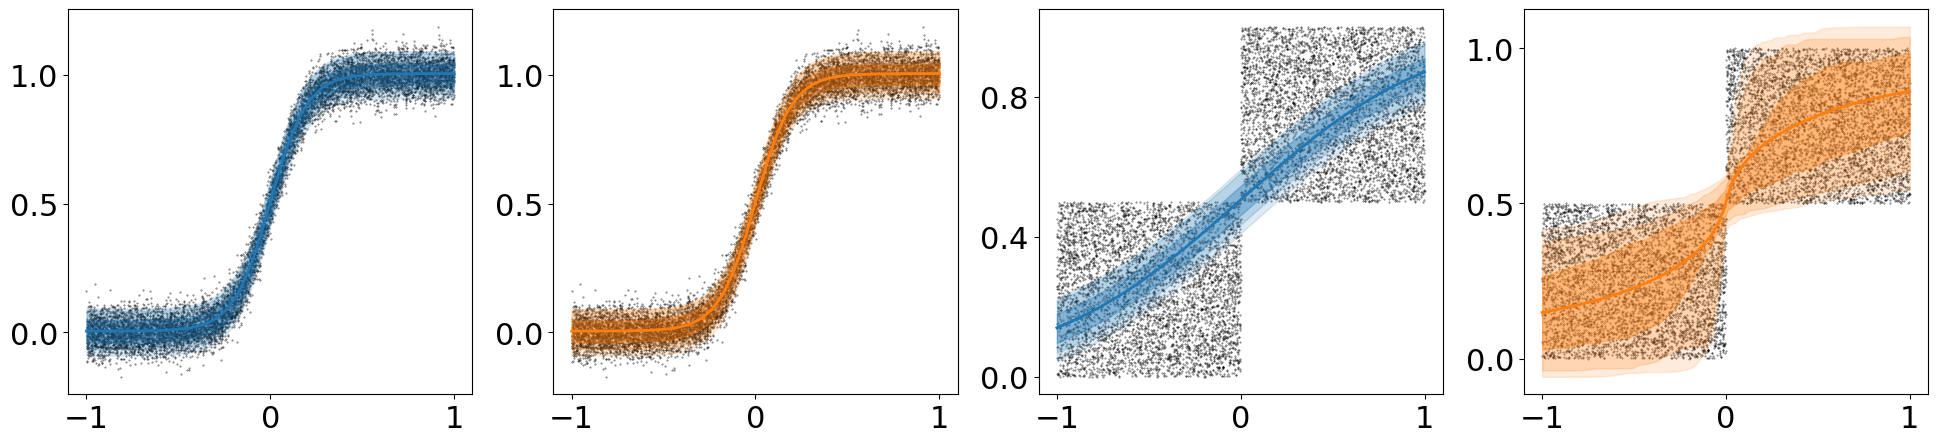

In [14]:
plot_predictives(
    experiment_sig_10000_w,
    experiment_sig_10000_m,
    intervals=[50, 80, 90]
)

MMD length scale: 0.27427948
Actual mmd 0.0006807348


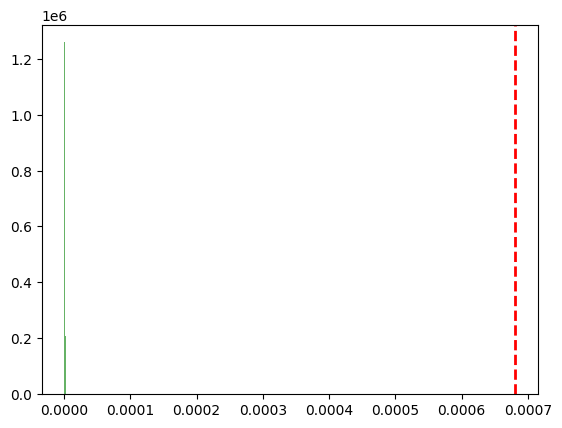

In [15]:
diagnostic_experiment_sig_10000_m = diagnostic_experiment(experiment_sig_10000_m)
all_mmd_values_sig_10000_m, actual_mmd_sig_10000_m = diagnostic_experiment_sig_10000_m.plot_diagnostic()

MMD length scale: 0.27387586
Actual mmd 0.0006788466


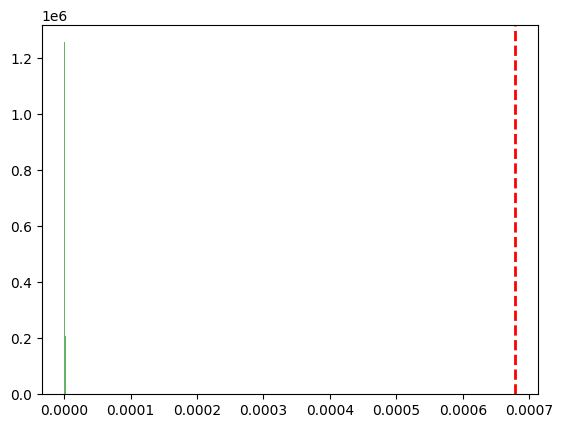

In [56]:
diagnostic_experiment_sig_10000_m = diagnostic_experiment(experiment_sig_10000_m)
all_mmd_values_sig_10000_m, actual_mmd_sig_10000_m = diagnostic_experiment_sig_10000_m.plot_diagnostic()

(array([33., 29., 13., 10., 10.,  1.,  2.,  1.,  0.,  1.]),
 array([1.87927469e-07, 4.79642495e-07, 7.71357520e-07, 1.06307255e-06,
        1.35478763e-06, 1.64650260e-06, 1.93821757e-06, 2.22993276e-06,
        2.52164773e-06, 2.81336270e-06, 3.10507789e-06]),
 <BarContainer object of 10 artists>)

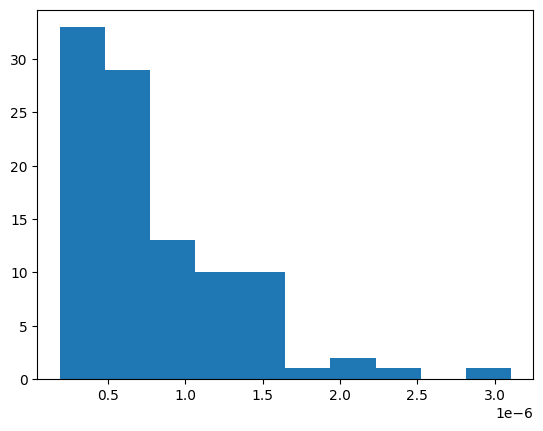

In [61]:
plt.hist(all_mmd_values_sig_10000_m)

In [77]:
import dill 

data_to_save = {
    'experiment_sig_100_w': experiment_sig_100_w,
    'diagnostic_experiment_sig_100_w': diagnostic_experiment_sig_100_w,
    'experiment_sig_100_m': experiment_sig_100_m,
    'diagnostic_experiment_sig_100_m': diagnostic_experiment_sig_100_m,

    'experiment_sig_1000_w': experiment_sig_1000_w,
    'diagnostic_experiment_sig_1000_w': diagnostic_experiment_sig_1000_w,
    'experiment_sig_1000_m': experiment_sig_1000_m,
    'diagnostic_experiment_sig_1000_m': diagnostic_experiment_sig_1000_m,

    'experiment_sig_10000_w': experiment_sig_10000_w,
    'diagnostic_experiment_sig_10000_w': diagnostic_experiment_sig_10000_w,
    'experiment_sig_10000_m': experiment_sig_10000_m,
    'diagnostic_experiment_sig_10000_m': diagnostic_experiment_sig_10000_m,
}
print("正在使用 dill.dump() 保存对象...")
with open('different_data_size.dill', 'wb') as f:
    dill.dump(data_to_save, f)

print("保存成功！")

正在使用 dill.dump() 保存对象...
保存成功！


In [ ]:
data_to_save

4